<a href="https://colab.research.google.com/github/arielya/SevenHoleProbe/blob/master/Seven_Hole_Probe_Calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h5 align="right">May 2019</h5>



#<h1 align="center">Seven-Hole Probe Calibration</h1>
<h3 align="center">Ariel Yaniv</h3>
<h3 align="center">Meadow Aerodynamics Laboratory, Tel-Aviv University</h3>
<h4 align="center">ariel.yaniv@tum.de</h3>

# Introduction



---

This document explains, in practice, how to calibrate a seven-hole probe, and the general handling of different coordinate systems in a wind tunnel. The seven-hole probe is an application used to indicate the velocity vector in the current point of the probe. It gives as an output the velocity magnitude and two angles. From these results, the three components of the velocity vector can be estimated. The probe estimate is calculated through correlating  the pressures and a polynomial. The polynomial coefficients should be found, or in other words, should be calibrated for the specific probe.

For the calibration, the probe gets as an input two angles in a certain reference system and three pressure coefficients. The pressure coefficient estimation is quite simple and will be discussed in the first part of this document. During the calibration process, the probe is set in a known angle relative to the upstream. The angle of the probe relative to the flow is set by two servo motors. The estimation of the angles is more complicated as it needs the angle to be in the probe reference system, which is not equal to the servo motor system angles. The transformation to the probe system depends on the servo motor system, and it will be explained for two different systems.

The seven-hole probe is a great example of the coordinate transformation between two different reference systems and to the global wind tunnel coordinate system. This document has been written in this format with the code, in order to explain not only the theory but also the practical applications.

---



# The Seven-Hole Probe

The seven-hole probe is an application that was first developed by NASA and the U.S. Air Force Academy to measure the velocity of three components. The probe is a stick with seven pressure holes that are usually located in a fixed point in the flow field. The figure below shows a drawing of the seven-hole probe and its coordinate system.

<div align="center">
<img src="https://github.com/arielya/SevenHoleProbe/blob/master/images/seven-hole-probe-02.png?raw=1"  text-align="center" align="center" width="40%"/>

<b>Figure 1</b>: Seven-hole probe front and side view with its fixed-body coordinate system <sup>[3]</sup></div>

During the calibration process, set the probe in a known angle to the flow and known velocity. This way for future applications, the flow angle relative to the probe and the velocity magnitude is given as a result. With this, the calculation of the velocity is given in three components. When mapping the vorticity in the wake behind an object this pratice proves useful.

Pressure input is then received from seven holes, and as an output, the velocity magnitude and two angles are given. This is calculated by matices multiplication between the pressure coefficients, calculated from the seven pressures of the probe, and the calibration coeffiecients matrix. The calibration coefficients are unique for certain probes and are a result of a calibration process.

As well as by the calibration as by the application, the estimation of the flow velocity and the angles distinguishes between two reference systems. The choice of the reference system is determined by the hole with the maximum pressure. Maximum pressure detected by the center hole will register as a small flow angle, and a maximum pressure detected by one of the surrounding holes signals a high flow angle. The polar reference system is most practical for the high flow angles, while the tangential reference system will be more practical for low flow angles.

Since this document is focused on the practical calibration and coordinate system and transformations, we will not go deeper here in the theory of the seven-hole probe. For more information see Rapid Calibration of Seven-Hole Probes, by A.L. Ericksen *et al* [3].

# The Calibration 

As mentioned before, the seven-hole probe needs as an input for the calibration angles in two different coordinate systems. Depending on the case, angles should be in a polar or a tangent coordinate system. The reference system is determinated by the hole with the greatest pressure. If the maximum pressure detected by the center hole, then the tangential reference system will be used, which is also related to small flow angles. Otherwise, the polar reference system will be used, which is defined for greater flow angles. Similarly, the angles output after the calibration will be in the same reference system. Here, the probe is divided into sectors, as proposed in Figure 3. Sector 7, is the center hole, and sectors 1 through 6 are the polar holes.

Figure 2 shows the seven-hole probe in a wind tunnel. The coordinate system is the probe fixed-body coordinate system. Vector $V$ is the flow velocity and $u$, $v$ and $w$ are the velocity's components relative to the probe coordinate system. The angles $\alpha_T$ and $\beta_T$ are the tangential reference system, and the $\theta$ and $\phi$ are polar reference system.


<div align="center">
<img src='https://drive.google.com/uc?export=view&id=1Xk9QrUb0M36mFm6CVVuwchqn7Zs1LV0B'  text-align="center" align="middle" width="80%"/>

<b>Figure 2</b>: Left: The seven-hole probe with its coordinate system and relative flow, right: the seven-hole section deviation <sup>[3]</sup></div>

The conventional reference system depends on the equipment setup. In Figure 2, the $\alpha$ and the $\beta$ represent the rotation of the $z$-axis with $\alpha$ followed by the $y$-axis with $\beta$. 

The conventional reference system in this document is different, since the following examples have a different servo motor system and a different probe holder system. In the next section, it will be explained how to get the equations for the conventional reference system. Afterward, the transformation from the conventional reference system to the other systems, tangential or polar, will be discussed. Two probe holders will be presented, which will create two different conventional reference systems.

As well as for the angles as for the calibration pressure coefficients, it distinguishes between the two reference systems. In the next section, the pressure cofficients will be reviewed as well as the referenced angles.

## Calibration - Pressure Coefficients

The complete set for the calibration includes three independent pressure coefficients resolved into the tangential or polar reference system. The final calibration coefficients matrix $K_n$ is a 20 by 4 matrix for each pressure hole or section, $n$. The coefficient matrix $C$ ist a 20 by 1 matrix. By $C$, the 20 entries of the matrix are built by a third degree polynomial from three pressure coefficients, $C_{\alpha_T}$ or $C_{\theta}$, $C_{\beta_T}$ or $C_{\phi}$ and $C_M$. Multiplication of these two matices yields the results vector $A$, which is a 1 by 4 vector with two angles and two pressure coefficients.
To solve the optimization problem and find the calibration coefficients matrix $K$, the result vector $A$ must be known: the two angles, $\alpha_T$ or $\theta$ and $\beta_T$ or $\phi$, and the two pressure coefficients $C_o$ and $C_q$. The next section defines the equations of the pressure coeffiecients, depending on the reference system. The angles will be disscused in the next section.

### Coefficients Matrix $C$
#### Tangential Reference System

The three ceofficients that build the polynom in the coefficient matrix in the tangential reference system are defined as follows:

$$
\begin{align}
  C_{\alpha_T} &= \frac{2}{3}\left( C_{\alpha a} +  \frac{1}{2}C_{\alpha v} -  \frac{1}{2}C_{\alpha c} \right)  \\
  C_{\beta_T} &  = \frac{2}{3}\left( \frac{\sqrt{3}}{2}C_{\alpha a} + \frac{\sqrt{3}}{2}C_{\alpha b} \right) 
\end{align}
$$
and
$$
\begin{align}
  C_{M} &= ( P_7 - \overline{P}_{1-6} ) / P_7
\end{align}
$$

where
$$
\begin{align}
  C_{\alpha a} &= \left( P_4 - P_1 \right) / ( P_7 - \overline{P}_{1-6} ) \\
  C_{\alpha b} &= \left( P_3 - P_6 \right) / ( P_7 - \overline{P}_{1-6} )\\
  C_{\alpha c} &= \left( P_2 - P_5 \right) / ( P_7 - \overline{P}_{1-6} ) 
\end{align}
$$

#### Polar Reference System

By the polar reference system, instead of $C_{\alpha_T}$, $C_{\beta_T}$ and $C_{M}$ the following coefficients for a cetain sector $n$ will be used:

$$
\begin{align}
  C_{\theta n} &= \frac{ P_n - P_7 }{ P_n - \frac{1}{2}(P_{n-1} + P_{n+1}) } \\
  \\
  C_{\phi n} &= \frac{ P_{n-1} - P_{n+1} }{ P_n - \frac{1}{2}(P_{n-1} + P_{n+1}) } \\
  \\
  C_{M n} &= \frac{ P_{n} - \frac{1}{2}(P_{n-1} + P_{n+1}) }{ P_n } 
\end{align}
$$

where $n$ represents the outer port numbers $(n = 1, ..., 6)$. When $n = 1$, replace $n-1$ with 6, and when $n = 6$, replace $n+1$ with 1.

The three pressure coefficients above, build the ceofficients matrix $C$, which will be defined in the code.

### The Result Vector $A$ 

Two pressure coefficients toegther with the two corresponding angles build the result vector $A$. By the calibration, it will be used to solve the optimition problem and to find the calibration coefficients of the matrix $K$ for each hole. The pressure coefficients are the total pressure coefficient, $C_o$, and the dynamic pressure coefficient, $C_q$.

For tangenial reference system, the vector $A$ defindes as:

$$
\begin{align}
  A = \left[\alpha_T,\ \beta_T,\ C_o,\ C_q\right]
\end{align}
$$ 
and for the polar system:
$$
\begin{align}
  A = \left[\theta,\ \phi,\ C_o,\ C_q\right]
\end{align}
$$

In the calibration process we know the velocity, or the static pressure, and the angles. Then we use thus to estimate the pressure coeffiecient, $C_o$ and $C_q$. For the tangenial reference system:

$$
\begin{align}
  C_o &=& (P_7 - P_o) / ( P_7 - \overline{P}_{1-6} ) \\ \\
  C_q &=& ( P_7 - \overline{P}_{1-6} ) / (P_o - P_\infty)
\end{align}
$$ 
and for the polar system:
$$
\begin{align}
  C_o &=& \frac{ P_n - P_o }{ P_n - \frac{1}{2}(P_{n-1} + P_{n+1}) } \\ \\
  C_q &=& \frac{ P_n - \frac{1}{2}(P_{n-1} + P_{n+1}) }{ P_o - P_\infty }
\end{align}
$$

$P_\infty$ is the static pressure and $P_o$ is the total pressure.

## The Calibration Algorithm

The code below outlines the calibration algorithm. This code does not include real measured data, but rather two example points for the errorless running of the code. 

The seven-hole probe moves in the wind tunnel and measures the pressure in a range of positions of alpha and beta angles. This data will be set into an array, where each element represents a struct with the measured data of a certain position defined by servo motor angles, alpha and beta.

After the initialization, the code will go through all the measured points and estimate the relevant coefficient and angles for each probe position. First, it pinpoints the maximal pressure hole, which will determine the reference system for the calculation of the coefficients and the angles. 

If the maximum pressure is found to be coming from the center hole, the calculatulation will be done with tangential reference system equations. Maximal pressure by any other hole will be calculated with polar reference system equations. Three coefficients and two angles are estimated for each point and are saved into an array (or list) of results for each hole. 

Finally, for each hole, a matrix of calibration constant coefficients $K_n$ is estimated algebraically by matrix multiplication of the coefficient matrix $C_n$ with the known result vector $A_n$. 

Here, the transformation from the servo motor angles, alpha and beta, to the polar or tangential angles is missing. The next step is to estimate these angles in $A$ to complete the equation system.

In [0]:
import numpy as np

# total and static pressure
# the total pressure can be also added to the measured point if it's measured
#   newly each time
pO = 1.2e5
pInf = 1.01325e5

# center hole index
idxCenterHole = 6

# for smooth run of the code
alphaT=1
betaT=1
theta=1
phi=1

# example of struct for single measured point
sevenHoleMeasPoint =	{
  "alpha": 0.0,
  "beta": 0.0,
  "p": [0.5,0.5,0,0,0,0,1]
}
sevenHoleMeasPoint2 =	{
  "alpha": 0.0,
  "beta": 0.0,
  "p": [0.5,0.5,0,0,0,0,1.3]
}
# example of list of measured points 
sevenHoleCalibSet = [sevenHoleMeasPoint, sevenHoleMeasPoint2]

# init calibration coefficients arrays
cAlphaTheta = (list(), list(), list(), list(), list(), list(), list())
cBetaPhi = (list(), list(), list(), list(), list(), list(), list())
cM = (list(), list(), list(), list(), list(), list(), list())

# init the result arrays
A = dict()
A['alphaTheta'] = (list(), list(), list(), list(), list(), list(), list())
A['betaPhi'] = (list(), list(), list(), list(), list(), list(), list())
A['Co'] = (list(), list(), list(), list(), list(), list(), list())
A['Cq'] = (list(), list(), list(), list(), list(), list(), list())

def calcTangetialPressureCoef(p):
  idxCenterHole = 6
  pMean = np.mean(p[0:6])
  cAlphaA = (p[3]-p[1]) / (p[idxCenterHole] - pMean)
  cAlphaB = (p[2]-p[5]) / (p[idxCenterHole] - pMean)
  cAlphaC = (p[1]-p[4]) / (p[idxCenterHole] - pMean)
    
  # calculate the coefficients
  cAlphaT = (2/3) * (cAlphaA + 0.5*cAlphaB - 0.5*cAlphaC)
  cBetaT = (2/3) * (np.sqrt(3)/2) * (cAlphaA + cAlphaB)
  cM7 = 1 - (pMean / p[idxCenterHole])
  
  return cAlphaT, cBetaT, cM7

def calcPolarPressureCoef(p, n):
  if n == 0:
    idxLeft = 5
    idxRight = n + 1
  elif n == 5:
    idxLeft = n - 1
    idxRight = 0
  else:
    idxLeft = n - 1
    idxRight = n + 1
      
  tempTerm = p[idxCenterHole] - ((p[idxLeft] + p[idxRight]) / 2.0)
  cThetaN = ((p[n] - p[idxCenterHole]) / tempTerm)
  cPhiN = ((p[idxLeft] - p[idxRight]) / tempTerm)
  cMn = tempTerm / p[n]
  
  return cThetaN, cPhiN, cMn

def calcCoefMatrix(cAlphaTheta, cBetaPhi, cM):
  C = np.transpose(np.matrix([
       np.ones(len(cM)), 
       cAlphaTheta, 
       cBetaPhi, 
       cM,
       np.power(cAlphaTheta, 2),
       np.power(cBetaPhi, 2), 
       np.power(cM, 2),
       np.multiply(cAlphaTheta,cBetaPhi),
       np.multiply(cAlphaTheta,cM),
       np.multiply(cBetaPhi, cM),
       np.power(cAlphaTheta, 3),
       np.power(cBetaPhi, 3),
       np.power(cM, 3),
       np.multiply(np.power(cAlphaTheta, 2), cBetaPhi),
       np.multiply(np.power(cAlphaTheta, 2), cM),
       np.multiply(np.power(cBetaPhi, 2), cAlphaTheta),
       np.multiply(np.power(cM, 2), cAlphaTheta),
       np.multiply(np.power(cBetaPhi, 2), cM),
       np.multiply(np.power(cM, 2), cBetaPhi),
       np.multiply(np.multiply(cAlphaTheta, cBetaPhi), cM)]))
  
  return C

for i, dataPoint in enumerate(sevenHoleCalibSet):
  p = dataPoint['p']
  alpha = dataPoint['alpha']
  beta = dataPoint['beta']
  n = np.argmax(p) # index of p max
  if n == idxCenterHole:
    # calculate calibration the coefficients
    cAlphaT, cBetaT, cM7 = calcTangetialPressureCoef(p)
    # append to list
    cAlphaTheta[idxCenterHole].append(cAlphaT)
    cBetaPhi[idxCenterHole].append(cBetaT)
    cM[idxCenterHole].append(cM7)
    
    pMean = np.mean(p[0:6])
    # Angles, Co, Cq
    Co = (p[idxCenterHole]-pO) / (p[idxCenterHole] - pMean)
    Cq = (p[idxCenterHole]-pMean) / (pO - pInf)
    
    A['Co'][idxCenterHole].append(Co)
    A['Cq'][idxCenterHole].append(Cq)
    
    #alphaT, betaT = clacTangentialAngles(alpha,beta)
    A['alphaTheta'][idxCenterHole].append(alphaT)
    A['betaPhi'][idxCenterHole].append(betaT)
  else:  
    # calculate calibration the coefficients
    cThetaN, cPhiN, cMn = calcPolarPressureCoef(p, n)
    # append
    cAlphaTheta[n].append(cThetaN)
    cBetaPhi[n].append(cPhiN)
    cM[n].append(cMn)
    
    # Angles, Co, Cq
    Co = (p[n]-pO) / (tempTerm)
    Cq = (tempTerm) / (pO - pInf)
    A['Co'][n].append(Co)
    A['Cq'][n].append(Cq)
    
    #theta, phi = clacPolarAngles(alpha,beta)
    A['alphaTheta'][n].append(theta)
    A['betaPhi'][n].append(phi)

    
K = [np.matrix([]), np.matrix([]), np.matrix([]),
     np.matrix([]), np.matrix([]), np.matrix([]),
     np.matrix([])]

for i in range(7):
  An = np.transpose(np.matrix([ A['alphaTheta'][i], A['betaPhi'][i], A['Co'][i], A['Cq'][i] ]))

  C = calcCoefMatrix(cAlphaTheta[i], cBetaPhi[i], cM[i])

  # K = (C^T * C^-1) * C^T * A
  if np.count_nonzero(C) != 0:
    K[i] = np.dot(np.dot( np.dot(np.transpose(C), C).I, np.transpose(C)), An)
  


# The Servo System at Meadow-Knapp Wind Tunnel

The calibration was executed at the Meadow-Knapp Wind Tunnel of Tel Aviv University. It's important to note, that this wind tunnel hosts two servo motors helping to determine the position of the seven-hole probe. The first motor moves in parallel to the wind tunnel's walls, and the second motor rotates in relation to the first. The sketch below outlines the wind tunnel and the two motors.

<div align="center">
<img src='https://drive.google.com/uc?export=view&id=1aqGia1umiLaaprpBMo9psabhaJUnjWN3'  text-align="center" align="middle" width="55%"/>

<b>Figure 3</b>: Sketch of the wind tunnel and the servo moror system</div>

The two perspex glass disks and the probe are rotated in parallel to the wind tunnel's walls by the servo motor. This  rotation is marked with $\alpha$. The second motor rotates the rod around its axis. This rotation is marked with $\beta$.

The transformation from the inertial coordinate system fixed by the wind tunnel to a fixed-body coordinate system is calculated by rotating $\alpha$ followed by $\beta$.

$$
\begin{equation}
\vec{U}_{body} = T_\beta T_\alpha \vec{U}_{iner}
\end{equation}
$$

When $T_\alpha$ and $T_\beta$ are the transformation matrices in $\alpha$, and $\beta$. $U_{body}$ is the velocity vector in a fixed body coordinate system, the vector $U_{iner}$ is the velocity vector inertial system. In the wind tunnel, this is equal to $U_{iner} = \left[ u_\infty, 0, 0\right]$. 

In the next sections, two cases will be discussed. Each case uses a different holder to connect the probes to the servo motors and therefore creates a different equation system for the calibration of the seven-hole probe.

The Figure below shows the probe mount in the wind tunnel and its coordinate system. Left, is the probe with the L-mount and in the right Figure, the probe mount by so-called X-mount. The probe coordinate system is fixed as described in Figure 1. In Figure 4, the probes are in an initial position of $\alpha = 0$ and $\beta=0$, and the probe coordinate system is equal with the wind tunnel's coordinate system. The difference between the two is the rotation that the probe undergoes when the servo motors rotate.


<div align="center">
<img src='https://drive.google.com/uc?export=view&id=1FY8tR6x0rovhosUgxjMwQ03k_warp40F'  text-align="center" align="middle" width="45%"/>
<img src='https://drive.google.com/uc?export=view&id=1wxiKqdOFyoR7Xc34JgpEjc4hjKDkQJCK'  text-align="center" align="middle" width="45%"/>

<b>Figure 4</b>: Left: L-mount rotation in $y$ and $z$ axes, right: X-mount rotation in $y$ and $x$ axes</div>




# Calibration - Angle Estimation

## L-Mount

The first probe mount is built to hold the probe in such a way that it rotates around its $y$ and its $z$-axes. In this case, the flow, in relation to the probe, can be described with the following equation:


$$
\begin{equation}
  \vec{U}_{probe} = T_z(\beta) \cdot T_y(\alpha) \cdot \vec{U}_{WT}
\end{equation}
$$


Where $U_{probe}$ is the flow vector in the fixed body reference system, then $U_{WT}$ is the flow vector in the inertial system of the wind tunnel. As previously mentioned in the last section, the flow vector is equal to $U_{WT} = \left[ u_\infty, 0, 0\right]$. $T_y(\alpha)$ and $T_z(\beta)$ respectively, are the transformation matrices of the axis $y$ as function of $\alpha$ and of the axis $z$ as function of $\beta$. Multiplication of this equation, results in the velocity vector of the probe reference system as the following:


$$
\begin{equation}
  U_{probe} = 
  \begin{bmatrix}
      u_x \\
      u_y \\
      u_z
   \end{bmatrix} =
   \begin{bmatrix}
       {\ \ }U_\infty \cdot \cos(\alpha) \cdot \cos(\beta)  \\
      -U_\infty \cdot \cos(\alpha) \cdot \sin(\beta)  \\
       U_\infty \cdot \sin(\alpha) 
   \end{bmatrix}
\end{equation}
$$


For the calibration, the probe needs the angles in the polar or tangential reference system. The angles of those reference systems can be determined from the equation above. We are actually calculating what would be $\theta$ and $\phi$ or $\alpha_T$ and $\beta_T$ for a given velocity vector that are determined by the servo motors. By the polar reference system, we are doing that when we set the velocity components equal to those from the polar reference systems:

$$
\begin{equation}
  U_{probe} = 
  \begin{bmatrix}
      u_x \\
      u_y \\
      u_z
   \end{bmatrix} =
   \begin{bmatrix}
       U_\infty \cdot \cos(\alpha) \cdot \cos(\beta)  \\
      -U_\infty \cdot \cos(\alpha) \cdot \sin(\beta)  \\
       U_\infty \cdot \sin(\alpha) 
   \end{bmatrix} = 
   \begin{bmatrix}
       U_\infty \cdot \cos(\theta)  \\
      -U_\infty \cdot \sin(\theta) \cdot \sin(\phi)  \\
       U_\infty \cdot \sin(\theta) \cdot \cos(\phi) 
   \end{bmatrix}
\end{equation}
$$

Finally, the polar system should be defined as follows: 

$$
\begin{align}
  \theta &= \arccos\left[\cos(\alpha) \cdot \cos(\beta)\right] \\
  \phi &= \arctan\left[-\frac{\sin(\beta)}{\tan(\alpha)} \right]
\end{align}
$$

To estimate the corresponding angles in the tangential reference system, the velocity components should be inserted into the following equation:

$$
\begin{align}
  \alpha_T &= \arctan \left[ \frac{u_z}{u_x} \right] = \arctan \left[ \frac{U_\infty \cdot \sin(\alpha)}{U_\infty \cdot \cos(\alpha) \cdot \cos(\beta)} \right]  \\
  \beta_T &  = \arctan \left[ \frac{u_y}{u_x} \right] = \arctan \left[ \frac{-U_\infty \cdot \cos(\alpha) \cdot \sin(\beta)}{U_\infty \cdot \cos(\alpha) \cdot \cos(\beta)} \right] 
\end{align}
$$

Cleaning up this equation results in the following relationship between the $\alpha_T$ and $\beta_T$ and the servo motor angles:

$$
\begin{align}
  \alpha_T &= \arctan \left[ \frac{\tan(\alpha)}{\cos(\beta)} \right]  \\
  \beta_T &  = -\beta  
\end{align}
$$

The code below estimates these equations. For this case, the servo motor, and thus the probe, move in $\alpha$ between negative and positive 60 degrees, and the rotation between $\beta$ equals -90 and 90 degrees. First, the flow vector for each servo motor's position, $\alpha$ and $\beta$, will be estimated. Then corresponding $\theta$ and $\phi$ or $\alpha_T$ and $\beta_T$ for each $\alpha$ and $\beta$ will be estimated. This transformation should be handled with extra care by this singularity, such as $0, \pm 90, \pm 180$, where if the $\sin$ or $\cos$ can occur division by zero. 

In [0]:
import numpy as np
import math 
import matplotlib.pyplot as plt


Uinf = 1.0;

alpha = np.arange(-60, 60, 0.5)
beta  = np.arange(-90, 90, 0.5)

theta  = np.zeros((beta.size,alpha.size), dtype=float);
phi    = np.zeros((beta.size,alpha.size), dtype=float);
alphaT = np.zeros((beta.size,alpha.size), dtype=float);
betaT  = np.zeros((beta.size,alpha.size), dtype=float);
Uvec = np.zeros((beta.size,alpha.size, 3), dtype=float);

for i, a in enumerate(alpha):
  for j, b in enumerate(beta):
    aRad = math.radians(a);
    bRad = math.radians(b);
    
    Uvec[j, i, 0] =  Uinf * math.cos(aRad) * math.cos(bRad);
    Uvec[j, i, 1] = -Uinf * math.cos(aRad) * math.sin(bRad);
    Uvec[j, i, 2] =  Uinf * math.sin(aRad);
    
    # calculate Theta and Phi
    if a >= 0:
      theta[j, i] =   math.degrees(math.acos(math.cos(aRad) * math.cos(bRad)));
    else:
      theta[j, i] = - math.degrees(math.acos(math.cos(aRad) * math.cos(bRad)));
      
    if math.sin(aRad) != 0:
      phi[j, i] = math.degrees(math.atan(- (math.cos(aRad) * math.sin(bRad)) / math.sin(aRad) ));
    else:
      if b >= 0:
        phi[j, i] = -90;
      else:
        phi[j, i] = 90;
        
    # calculate AlphaT and BetaT
    if np.cos(bRad) != 0:
      alphaT[j, i] = np.degrees(np.arctan(np.tan(aRad) / np.cos(bRad)));
    else:
      alphaT[j, i] = a;
      
    betaT[j, i] = -b;


In [0]:
def mySubPlot(alpha, beta, *argv):
  print("")
  nargv = len(argv) / 2
  
  # creat global level label vector
  tempMaxValue = 0.0;
  tempMinValue = 0.0;
  for i, arg in enumerate(argv):
    if i % 2 != 0:
      maxValue = np.amax(arg);
      maxValue = np.amax([maxValue, tempMaxValue]);
      minValue = np.amin(arg);
      minValue = np.amin([minValue, tempMinValue]);
     

  levelsArray = np.linspace(round(minValue), round(maxValue), 25)
  
  # plot data
  fig, axes = plt.subplots(nrows=1, ncols=int(nargv))
  for i, arg in enumerate(argv):
    if i % 2 == 0:
      title = arg;
    else: 
      ax = plt.subplot(1, nargv, (i+1)/2)

      cp = plt.contourf(alpha, beta, arg, levels=levelsArray, cmap='RdBu')

      ax.set_title(title)
      ax.set_xlabel(r'$\alpha$ [deg]')
      if i==1:
        ax.set_ylabel(r'$\beta$ [deg]')
      ax.set_aspect('equal')
      ax.grid(False)
      
      
  fig.subplots_adjust(right=0.8)
  cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
  fig.colorbar(cp, cax=cbar_ax)
  
  plt.show()
  

### Transformation Results

Reviewing the execution of the code from the last section, reveals the corresponding results of each position for $\alpha$ and $\beta$. It is important to look into the results and to understand what we see. The first two figures show the transformation from the servo motor angles to the polar system, and the next two figures are the transformation into the tangential reference system. Here, it is important to check that the results have a sufficient range and no singularity. 

The last three figures are the velocity components, $u_x$, $u_y$ and $u_z$, in the fixed-body probe coordinate system. To validate this transformation, in the next section the flow field will be calculated with the result angles, $\theta$ and $\phi$ or $\alpha_T$ and $\beta_T$. If these angles and the equation of the polar system result in the same flow field as in the previous section, then the assumptions of the transformations were correct.

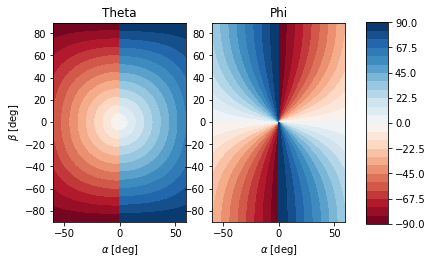

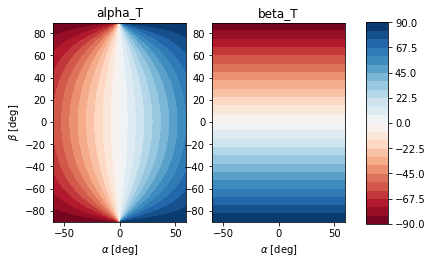

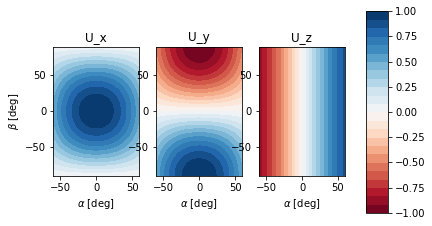

In [0]:
# plot Theta and Phi
mySubPlot(alpha, beta,
          'Theta', theta,
          'Phi', phi)

# plot TAlpha_T and Beta_T
mySubPlot(alpha, beta,
          'alpha_T', alphaT,
          'beta_T', betaT)

# plot the velocity vector field
mySubPlot(alpha, beta,
                'U_x', Uvec[:,:,0],
                'U_y', Uvec[:,:,1],
                'U_z', Uvec[:,:,2])


### Transformation Validation

**Recall from the principles of the seven-hole probe gives, as a result, two angles and the velocity magnitude.** It doesn't matter with which servo motor system we calibrated the probe. The calibration input is in the tangential or polar reference system, so the results will also be  in the tangential or polar reference system as shown in Figure 2.

To check the transformation between the reference systems, the flow field with $\theta$ and $\phi$ or with $\alpha_T$ and $\beta_T$ has been calculated. If it results in exactly the same flow field as calculated in the last section with $\alpha$ and $\beta$, then the transformation was correct. 

From the velocity magnitude and $\alpha_T$ and $\beta_T$ alone, the three components of the velocity vector cannot be estimated. So a transformation from those angles to the polar angles is required. To substitute the equation of the polar system into the tangential: 

$$
\begin{align}
  \tan(\alpha_T) &= \frac{u_z}{u_x} = \frac{U_\infty \cdot \sin(\theta) \cdot \cos(\phi)}{U_\infty \cdot \cos(\theta)} \\
  \tan(\beta_T) &  = \frac{u_y}{u_x} = \frac{U_\infty \cdot \sin(\theta) \cdot \sin(\phi)}{U_\infty \cdot \cos(\theta)}
\end{align}
$$

This results in the following relations:

$$
\begin{align}
  \phi &= \arctan \left[ \frac{\tan(\beta_T)}{\tan(\alpha_T)} \right] \\
  \theta &= \arctan \left[ \frac{\tan(\alpha_T)}{\cos(\phi)} \right] \quad \text{or} \quad \theta = \arctan \left[ \frac{\tan(\beta_T)}{\sin(\phi)} \right] 
\end{align} 
$$

The velocity field from these angles is calculated with ordinary polar equations. Also here, the flow field calculated with these angles should be the same as the flow field calculated with the servo motors angles.

In [0]:

UvecBack = np.zeros((beta.size,alpha.size, 3), dtype=float);

UvecBack4Tang = np.zeros((beta.size,alpha.size, 3), dtype=float);

for i, row in enumerate(theta):
  for j, thetaTemp in enumerate(row):
    
    thetaRad = math.radians(theta[i,j])
    phiRad = math.radians(phi[i,j])
    
    UvecBack[i,j, 0] = Uinf * math.cos(thetaRad);
    UvecBack[i,j, 1] = Uinf * math.sin(thetaRad) * math.sin(phiRad);
    UvecBack[i,j, 2] = Uinf * math.sin(thetaRad) * math.cos(phiRad);
    
    alphaTRad = np.radians(alphaT[i,j]);
    betaTRad = np.radians(betaT[i,j]);
    if np.cos(betaTRad) != 0 and np.sin(alphaTRad) != 0:
      phiFromTanRad = np.arctan(np.tan(betaTRad) / np.tan(alphaTRad));
      if np.cos(phiFromTanRad) != 0:
        thetaFromTanRad = np.arctan(np.tan(alphaTRad) / np.cos(phiFromTanRad));
      else:
        thetaFromTanRad = np.arctan(np.tan(betaTRad) / np.sin(phiFromTanRad));
        
    elif np.sin(alphaTRad) == 0:
      thetaFromTanRad = betaTRad;
      phiFromTanRad = np.pi / 2.0;
      
    elif np.cos(betaTRad) == 0:
      thetaFromTanRad = 0.0;
      phiFromTanRad = thetaRad;
      
    UvecBack4Tang[i,j, 0] = Uinf * math.cos(thetaFromTanRad);
    UvecBack4Tang[i,j, 1] = Uinf * math.sin(thetaFromTanRad) * math.sin(phiFromTanRad);
    UvecBack4Tang[i,j, 2] = Uinf * math.sin(thetaFromTanRad) * math.cos(phiFromTanRad);
    



In the result figures below the same velocity fields for the corresponding $\alpha$ and $\beta$ results from the estimation with $\theta$ and $\phi$ or with $\alpha_T$ and $\beta_T$. It means that the original transformation from servo motor angles to the probe system was correct.

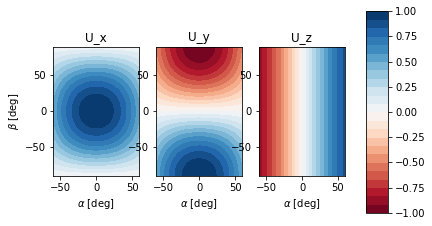

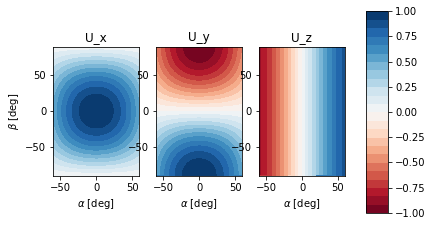

In [0]:
mySubPlot(alpha, beta,
                'U_x', UvecBack[:,:,0],
                'U_y', UvecBack[:,:,1],
                'U_z', UvecBack[:,:,2])

mySubPlot(alpha, beta,
                'U_x', UvecBack4Tang[:,:,0], 
                'U_y', UvecBack4Tang[:,:,1],
                'U_z', UvecBack4Tang[:,:,2])


## X-Mount

Similar to the calibration in the last section, the seven-hole probe can be calibrated also when using another servo motor system or probe Mount. In this section, the same servo system with a different mount will be used. The mount enables the rotation of the probe in its $y$-axis, followed by a rotation around its $x$ axes. The equation for the transformation from the internal wind tunnel system to the probe reference system can be described by:

$$
\begin{equation}
  \vec{U}_{probe} = T_x(\beta) \cdot T_y(\alpha) \cdot \vec{U}_{WT}
\end{equation}
$$

Multiplication of this equation results in the velocity vector of the probe reference system as follows:

$$
\begin{equation}
  U_{probe} = 
  \begin{bmatrix}
      u_x \\
      u_y \\
      u_z
   \end{bmatrix} =
   \begin{bmatrix}
       U_\infty \cdot \cos(\alpha)  \\
       U_\infty \cdot \sin(\alpha) \cdot \sin(\beta)  \\
       U_\infty \cdot \sin(\alpha) \cdot \cos(\beta)
   \end{bmatrix}
\end{equation}
$$

Extract from these equations, the angles for the polar reference system to provide a simple relation between $\alpha$ and $\beta$ and $\theta$ and $\phi$.

$$
\begin{align}
  \theta &= \alpha \\
  \phi &= \beta
\end{align}
$$

To estimate the relation between the servo angles and the tangential angles, the velocity components must be inserted into the tangential equations. Solving these equations result in the following relations:

$$
\begin{align}
  \alpha_T &= \arctan\left[ \tan(\alpha) \cdot \cos(\beta) \right] \\
  \beta_T &= \arctan\left[ \tan(\alpha) \cdot \sin(\beta) \right] 
\end{align}
$$

The code below calculates the corresponding the velocity vectors, polar and tangential angles for each $\alpha$ and $\beta$.


In [0]:
import numpy as np
import math 
import matplotlib.pyplot as plt

Uinf = 1.0;

alpha = np.arange(-90, 90, 0.5);
beta  = np.arange(-90, 90, 0.25);

theta = np.zeros((beta.size,alpha.size), dtype=float);
phi = np.zeros((beta.size,alpha.size), dtype=float);
alphaT = np.zeros((beta.size,alpha.size), dtype=float);
betaT = np.zeros((beta.size,alpha.size), dtype=float);
Uvec = np.zeros((beta.size,alpha.size, 3), dtype=float);

for i, a in enumerate(alpha):
  for j, b in enumerate(beta):
    aRad = math.radians(a);
    bRad = math.radians(b);
    
    Uvec[j, i, 0] = Uinf * math.cos(aRad);
    Uvec[j, i, 1] = Uinf * math.sin(aRad) * math.sin(bRad);
    Uvec[j, i, 2] = Uinf * math.sin(aRad) * math.cos(bRad);
    
    theta[j, i] = a;
    phi[j, i]   = b;
    
    if np.cos(aRad) != 0:
      alphaT[j, i] = np.degrees(np.arctan(np.tan(aRad) * np.cos(bRad)));
      betaT[j, i]  = np.degrees(np.arctan(np.tan(aRad) * np.sin(bRad)));
    else:
      alphaT[j, i] = a;
      betaT[j, i]  = b;

### Transformation Results

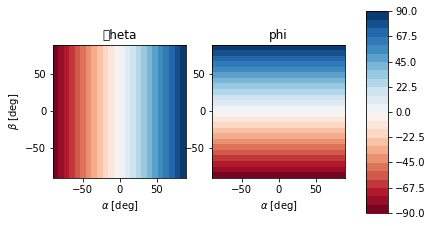

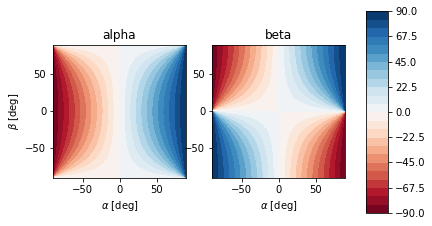

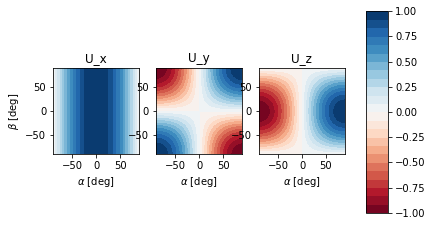

In [3]:
# plot Theta and Phi
mySubPlot(alpha, beta,
          '\theta', theta,
          'phi', phi)

# plot Alpha_T and Beta_T
mySubPlot(alpha, beta,
          'alpha', alphaT,
          'beta', betaT)

# plot the velocity vector field
mySubPlot(alpha, beta,
                'U_x', Uvec[:,:,0],
                'U_y', Uvec[:,:,1],
                'U_z', Uvec[:,:,2])

### Transformation Validation

Since the resulted angles from the probe are always given in the probe polar and tangential reference system, the velocity equations, as well as the transformation from tangential to polar system, are the same as for the Fork-Holder. 

In [0]:
UvecBack = np.zeros((beta.size,alpha.size, 3), dtype=float);
UvecBack4Tang = np.zeros((beta.size,alpha.size, 3), dtype=float);

for i, row in enumerate(theta):
  for j, thetaTemp in enumerate(row):
    
    thetaRad = math.radians(theta[i,j])
    phiRad = math.radians(phi[i,j])
    
    UvecBack[i,j, 0] = Uinf * math.cos(thetaRad);
    UvecBack[i,j, 1] = Uinf * math.sin(thetaRad) * math.sin(phiRad);
    UvecBack[i,j, 2] = Uinf * math.sin(thetaRad) * math.cos(phiRad);
    
    alphaTRad = np.radians(alphaT[i,j]);
    betaTRad = np.radians(betaT[i,j]);
    if np.cos(betaTRad) != 0 and np.sin(alphaTRad) != 0:
      phiFromTanRad = np.arctan(np.tan(betaTRad) / np.tan(alphaTRad));
      if np.cos(phiFromTanRad) != 0:
        thetaFromTanRad = np.arctan(np.tan(alphaTRad) / np.cos(phiFromTanRad));
      else:
        thetaFromTanRad = np.arctan(np.tan(betaTRad) / np.sin(phiFromTanRad));
        
    elif np.sin(alphaTRad) == 0:
      thetaFromTanRad = betaTRad;
      phiFromTanRad = np.pi / 2.0;
      
    elif np.cos(betaTRad) == 0:
      thetaFromTanRad = 0.0;
      phiFromTanRad = thetaRad;
      
    UvecBack4Tang[i,j, 0] = Uinf * math.cos(thetaFromTanRad);
    UvecBack4Tang[i,j, 1] = Uinf * math.sin(thetaFromTanRad) * math.sin(phiFromTanRad);
    UvecBack4Tang[i,j, 2] = Uinf * math.sin(thetaFromTanRad) * math.cos(phiFromTanRad);

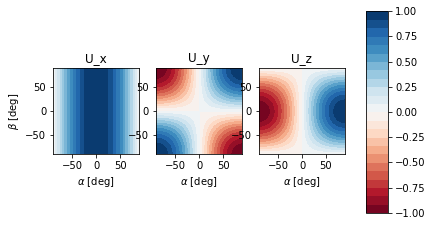

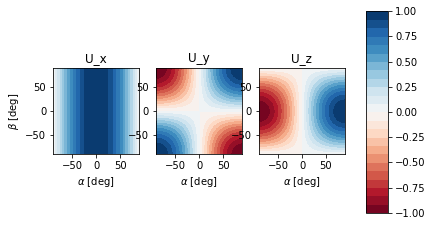

In [5]:

mySubPlot(alpha, beta,
                'U_x', UvecBack[:,:,0], 
                'U_y', UvecBack[:,:,1],
                'U_z', UvecBack[:,:,2])

mySubPlot(alpha, beta,
                'U_x', UvecBack4Tang[:,:,0], 
                'U_y', UvecBack4Tang[:,:,1],
                'U_z', UvecBack4Tang[:,:,2])

# Summary
The practical calibration of a seven-hole probe with a python code has been shown. The seven-hole probe distinguishes between two reference systems: the tangential and the polar reference systems. The pressure matrix of the coefficient and the constant matrix coefficients for the calibration have been defined, as well as the results vector for the calibration.

The transformation between the coordinate system has been shown using the example of the calibration of a seven-hole probe in a wind tunnel. The wind tunnel and the moving probes are also a good example for many applications that can be found in wind tunnel experiments. The transformation between the known servo system angles and the required probe reference system angle has been defined. Validation of these transformations was carried out in order to prove the correctness of the equation and the transformation of the singular angles.

This document was constructed to serve those who want to use a seven-hole probe in their aerodynamic research.


# References

[1]
Zilliac, G.G.
*Modelling, calibration, and error analysis of seven-hole pressure probes*
(1993) Experiments in Fluids: Experimental Methods and their Applications to Fluid Flow, 14 (1), pp. 104-120.

[2]
Everett, K.N., Gerner, A.A., Durston, D.A.
*Seven-hole cone probes for high angle flow measurement: Theory and calibration*
(1983) AIAA Journal, 21 (7), pp. 992-998.

[3]
L. Ericksen, A & W. Gallington, R & M. Rao, B & S. Barankiewicz, W. (1995). Rapid calibration of seven-hole probes. October 1995. Technical Report. NASA Lewis Research Center; Cleveland, OH, United States.